<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [5]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

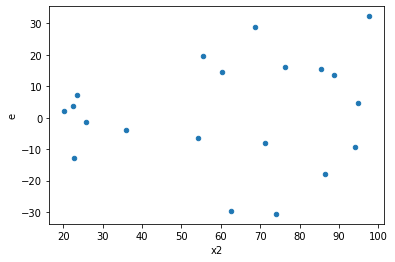

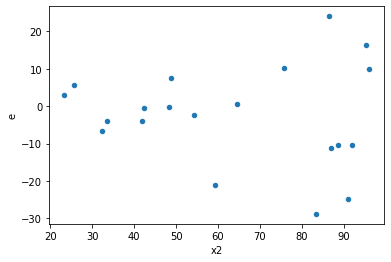

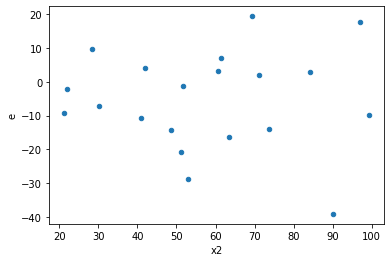

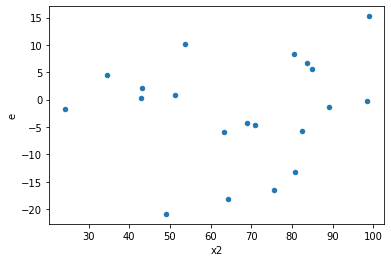

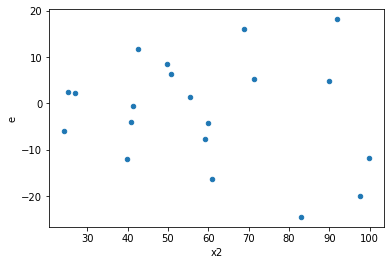

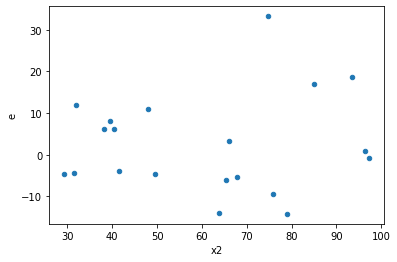

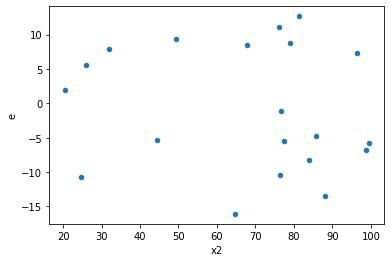

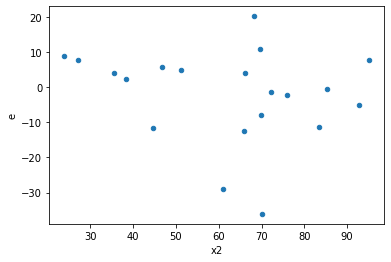

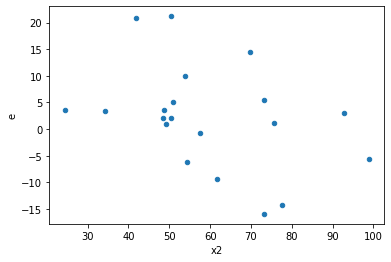

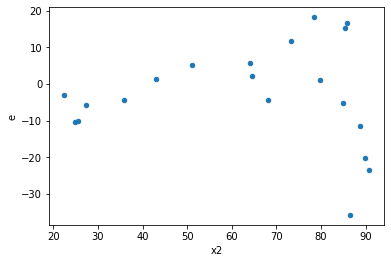

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,183.05465202464086,1635.9996346390458,45.763663006160215,408.99990865976145,8.937219658415591,0.05668422609198687,0.9716578869540066,0.028342113045993433,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,85.06167007872723,1257.8206068409954,21.265417519681808,314.45515171024886,14.787160958359308,0.023057123639556032,0.988471438180222,0.011528561819778016,Reject005=0 : Heteroscedasticity
4.0,4.0,4.0,218.04671448848057,430.08260865004314,54.511678622120144,107.52065216251079,1.9724333368607783,0.5267811636344728,0.7366094181827636,0.2633905818172364,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,137.3694831691968,1173.2495523719444,34.3423707922992,293.3123880929861,8.54083108783967,0.061308416644513475,0.9693457916777433,0.030654208322256737,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,58.9459298128053,70.95455830720006,14.736482453201326,17.738639576800015,1.2037227766621135,0.8617277744477867,0.5691361127761067,0.43086388722389335,Reject005=1 : Homoscedasticity
9.0,4.0,4.0,16.743701095377116,1119.6649238910131,4.185925273844279,279.9162309727533,66.87081413560047,0.0012897280647683473,0.9993551359676158,0.0006448640323841737,Reject005=0 : Heteroscedasticity
10.0,4.0,4.0,256.51060285686253,640.434191555114,64.12765071421563,160.1085478887785,2.496716254308161,0.3971587348693322,0.8014206325653339,0.1985793674346661,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,156.45903584101723,821.50084511513,39.114758960254306,205.3752112787825,5.250581027163442,0.13719201386886715,0.9314039930655664,0.06859600693443357,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,442.0682496937453,1110.874119833883,110.51706242343633,277.71852995847075,2.5129018440104463,0.3939344726885565,0.8030327636557217,0.19696723634427826,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,183.05465202464086,1635.9996346390458,45.763663006160215,408.99990865976145,8.937219658415591,0.05668422609198687,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,108.93787311476831,86.51176758161509,27.234468278692077,21.627941895403772,0.7941385774116697,0.8286436724781278,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,85.06167007872723,1257.8206068409954,21.265417519681808,314.45515171024886,14.787160958359308,0.023057123639556032,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,357.8925226605096,327.7297159718217,89.4731306651274,81.93242899295542,0.9157210481390812,0.9340525748182179,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,218.04671448848057,430.08260865004314,54.511678622120144,107.52065216251079,1.9724333368607783,0.5267811636344728,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,137.3694831691968,1173.2495523719444,34.3423707922992,293.3123880929861,8.54083108783967,0.061308416644513475,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,523.5074156588256,260.72480236928305,130.8768539147064,65.18120059232076,0.49803459238713,0.516187623156947,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,58.9459298128053,70.95455830720006,14.736482453201326,17.738639576800015,1.2037227766621135,0.8617277744477867,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,335.0370718903082,300.9467210485715,83.75926797257705,75.23668026214287,0.8982490186850189,0.9196731865349097,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      837
Reject005=0 : Heteroscedasticity    163
Name: Result_test, dtype: int64